## The Dataset

The Movie Database (TMDB) is a community built database that includes varieties of media dating back to 2008 and a wide variety of international media. The Internet Movie Database (IMDB) is similar in that it includes a variety of media reviews and related information. 

The current dataset incorporates only film information from TMDB and IMDB. The information is in varying data types, such as integers, objects, and floats. Such features include information about film release date, budget, runtime, revenue, and genre. 

Dataset link: https://www.kaggle.com/datasets/ggtejas/tmdb-imdb-merged-movies-dataset/data

## Imports 

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## EDA 

In [6]:
# Reading the data

df = pd.read_csv("../Bootcamp Data/TMDB  IMDB Movies Dataset.csv")

In [7]:
# Dtypes

df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
tconst                   object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
directors                object
writers                  object
averageRating           float64
numVotes                  int64
cast                     object
dtype: object

There is a variety of data types in the dataset. Objects will have to be encoded in the EDA portion and numerical values will likely have to be scaled so that one feature does not dominate other features with smaller ranges. 

In [9]:
# Head

df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2661428,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2308029,"Matthew McConaughey, Anne Hathaway, Michael Ca..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2994366,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1423650,"Sam Worthington, Zoe Saldaña, Sigourney Weaver..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1499508,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


As illustrated above, the dataset includes many features relevant to single films, such as the release date, the vote average, and runtime. Some of these features are redundant (id) or unneeded for the current purposes (the backdrop path, cast) and will be removed in the EDA portion. 

In [11]:
# Tail 

df.tail()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
433377,267245,The World's Craziest Army,0.0,0,Released,1958-10-30,0,86,False,/bklFoq9oCZFnLca6Hfv1y3EF8QI.jpg,...,"Comedy, War",Arca-Filmproduktion,Germany,German,NaN,Wolfgang Wehrum,"Hanns H. Fischer, Heinz Fiedler",4.6,34,"Harald Juhnke, Gardy Granass, Hubert von Meyer..."
433378,267244,Philharmoniker,0.0,0,Released,1944-12-04,0,0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Paul Verhoeven,"Erich Ebermayer, Friedrich Herzfeld, Paul Verh...",7.0,25,"Eugen Klöpfer, Will Quadflieg, Irene von Meyen..."
433379,267243,Der Pfingstausflug,0.0,0,Released,1978-12-23,0,0,False,NaN,...,Comedy,ZDF,Germany,German,NaN,Michael Günther,"Michael Günther, Peter Albrechtsen",7.5,42,"Elisabeth Bergner, Martin Held, Evelyn Hamann,..."
433380,267242,Die Pfarrhauskomödie,0.0,0,Released,1972-09-25,0,0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Veit Relin,"Heinrich Lautensack, Veit Relin",4.4,13,"Maria Schell, Veit Relin, Jane Tilden, Hugo Li..."
433381,424725,Lines,0.0,0,Released,2016-11-21,0,88,False,/tfFc8XtUKGctK7unRrWVTXA5Wuk.jpg,...,Drama,"Horme Pictures, Greek Film Centre, E.R.T.T.",Greece,Greek,NaN,Vassilis Mazomenos,Vassilis Mazomenos,6.1,179,"Anna Kalaitzidou, Vasilis Mazomenos, Themis Pa..."


It is more evident in the tail of the dataframe that there are many missing values, especially in the voting average and revenue features, which are key components of the analysis. However, the dataframe is quite large with over 400,000 points. Therefore in the EDA portion these NaN rows will likely be removed.  

In [13]:
# Statistics

df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,averageRating,numVotes
count,4.333820e+05,433382.000000,433382.000000,4.333820e+05,433382.000000,4.333820e+05,433382.000000,433382.000000,4.333820e+05
mean,4.810788e+05,3.618637,49.172271,1.653897e+06,66.463529,6.433898e+05,2.210846,6.234440,2.891838e+03
std,3.468429e+05,3.143813,514.372267,2.612347e+07,63.350882,7.230839e+06,11.377215,1.312946,3.232317e+04
min,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,5.000000e+00
25%,2.078418e+05,0.000000,0.000000,0.000000e+00,15.000000,0.000000e+00,0.600000,5.400000,2.100000e+01
50%,4.146160e+05,4.667000,1.000000,0.000000e+00,80.000000,0.000000e+00,0.865000,6.300000,6.100000e+01
75%,6.942928e+05,6.200000,6.000000,0.000000e+00,96.000000,0.000000e+00,1.669000,7.100000,2.760000e+02
max,1.448263e+06,10.000000,34495.000000,2.923706e+09,14400.000000,8.880000e+08,2994.357000,10.000000,3.018055e+06


In the table above it is much more evident that all of the relevent numerical features must be scaled to a similar range. The budget feature alone, as predicted, eclipses the voting average feature with a mean of over half a million while the voting average has a mean of only 3.6. 

In [15]:
# Info summary 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433382 entries, 0 to 433381
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    433382 non-null  int64  
 1   title                 433382 non-null  object 
 2   vote_average          433382 non-null  float64
 3   vote_count            433382 non-null  int64  
 4   status                433382 non-null  object 
 5   release_date          414840 non-null  object 
 6   revenue               433382 non-null  int64  
 7   runtime               433382 non-null  int64  
 8   adult                 433382 non-null  bool   
 9   backdrop_path         183912 non-null  object 
 10  budget                433382 non-null  int64  
 11  homepage              54228 non-null   object 
 12  tconst                433382 non-null  object 
 13  original_language     433382 non-null  object 
 14  original_title        433382 non-null  object 
 15  

In the summary of the dataset above, it is evident that some features will be discarded due to too many missing values (keywords). It is also clear some features, by name, do not seem particularly useful, in addition to having many missing values with little potential to benefit from improvised values (tagline).  

In [17]:
# NaNs

df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date             18542
revenue                      0
runtime                      0
adult                        0
backdrop_path           249470
budget                       0
homepage                379154
tconst                       0
original_language            0
original_title               0
overview                 41520
popularity                   0
poster_path              74480
tagline                 342204
genres                   77613
production_companies    171248
production_countries    111966
spoken_languages        101725
keywords                262701
directors                10292
writers                  66688
averageRating                0
numVotes                     0
cast                     68446
dtype: int64

As demonstrated above, there are many NaNs that need to be handled in the EDA section. 

## Data Preparation

In [20]:
# Dropping redundant features

df = df.drop(['id', 'original_title', 'spoken_languages', 'numVotes', 'averageRating', 'popularity'], axis=1)

First and foremost, these features are entirely unnecessary. Though many movies in the dataset may share the same name, ID is redundant when row location will suffice for identifying unique data points. Original Title is also unneeded when Title is included. Spoken Languages will be removed because Original Language seems intuitively like a more interesting feature to analyze. There is no category detailing the country of origin so Original Language will serve as an interpretive stand in. NumVotes is unnecessary when Vote Count is also present in the dataset. AverageRating is not needed when Vote Average is also present. Popularity is redundant when Revenue and Vote Average both represent similar aspects. 

In [22]:
# Dropping unneeded features

df = df.drop(['backdrop_path', 'homepage', 'tconst', 'poster_path', 'tagline', 'keywords', 'cast', 'overview'], axis=1)

The next features dropped are deemed simply unneeded for the current analysis. Backdrop Path and Poster Path are tied to film visuals. Tagline is used for marketing and not very helpful for predicting Revenue, similar to Keywords and Homepage. Cast could be interesting, as more famous actors and actresses would likely contribute to generating films with greater Revenue, however the feature itself appears hard to encode into usable data, as each individual film has a list of sometimes as many as 10 actors or actresses. Directors is a more friendly feature worth analyzing, being much more interpretable with fewer names. Overview is merely a summary of the film. 

Lastly, a quick look at Status lists the unique values below: 

In [24]:
# Status values 

df['status'].unique()

array(['Released', 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

Since the purpose of the models is to predict the classification of hypothetical movies, it is only worth looking at films that have been released to the general public and have in turn generated concrete values for Revenue, Vote Average and Budget. Any films that are not 'Released' have data that is not presently relevant. 

In [26]:
# Dropping Status

df = df.drop(['status'], axis=1)

In [27]:
# Dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433382 entries, 0 to 433381
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 433382 non-null  object 
 1   vote_average          433382 non-null  float64
 2   vote_count            433382 non-null  int64  
 3   release_date          414840 non-null  object 
 4   revenue               433382 non-null  int64  
 5   runtime               433382 non-null  int64  
 6   adult                 433382 non-null  bool   
 7   budget                433382 non-null  int64  
 8   original_language     433382 non-null  object 
 9   genres                355769 non-null  object 
 10  production_companies  262134 non-null  object 
 11  production_countries  321416 non-null  object 
 12  directors             423090 non-null  object 
 13  writers               366694 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(8)
memory u

After removing unrelated or unneeded features, the dataframe now exists with the features above. The next step is to handle any missing or NaN values. 

In [29]:
# Handling nans 

df.isnull().sum()

title                        0
vote_average                 0
vote_count                   0
release_date             18542
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
genres                   77613
production_companies    171248
production_countries    111966
directors                10292
writers                  66688
dtype: int64

There are a lot of missing values in the features above. It reduces the integrity of the data to substitute values with the mean, median, or mode for any the features. Additionally, a lot of these values are outwardly relevant to the analysis. Genres and Production Companies could both play vital roles in determining a film's popularity or impacting its Revenue. Therefore the best solution is to remove rows with missing values. 

In [31]:
# Removing NaNs 

df = df.dropna()

Below are several visualizations and graphics in order to better understand the structure and spread of the data's features. 

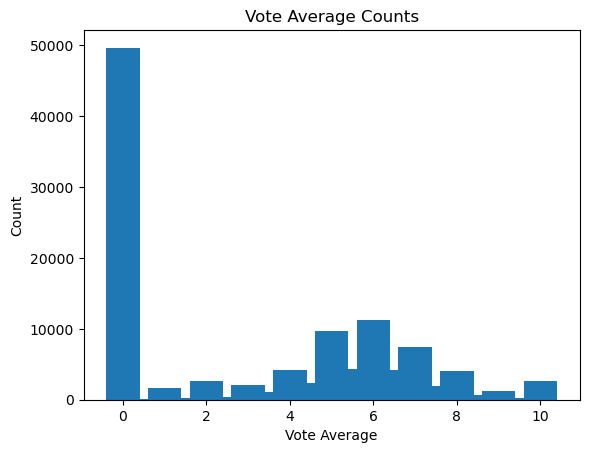

In [33]:
# Vote Average

# Groupby vote average scores 

vote_av = df.groupby('vote_average')['vote_average'].count().reset_index(name='Count')

# Barplot of vote average 

plt.bar(data=vote_av, height='Count', x='vote_average')

plt.title('Vote Average Counts')

plt.xlabel('Vote Average')

plt.ylabel('Count')

plt.show()

Interestingly, the data seems to nearly fit a bell curve. It appears that scores in the mid-range have the second-highest number of votes. It is predictable that more films will fall on the "average" side as opposed to being exceptionally good. However, there is an overwhelming number of films with a Vote Average of 0 compared to other scores.

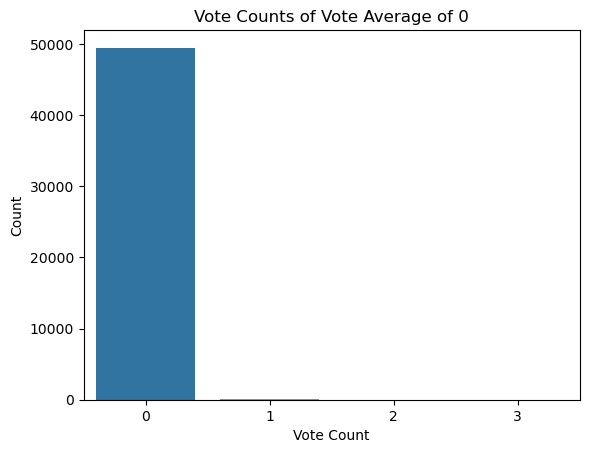

In [35]:
# Vote Count and Vote Average 

vc_va = df.loc[df['vote_average'] == 0]

# Grouby look at vote average 

vc_va = vc_va.groupby('vote_count')['vote_count'].count().reset_index(name='Count')

# Barplot of vote count of vote average of 0

sns.barplot(data=vc_va, x='vote_count', y='Count')

plt.title('Vote Counts of Vote Average of 0')

plt.xlabel('Vote Count')

plt.show()

If I isolate films with a Vote Average of 0 and look at Vote Count for those films it is clear the majority of films with an average vote of 0 have a very low Vote Count. With such low audience feedback, and thus insufficient evidence based on direct audience engagement, films with lower voting averages are likely less popular and subequently less likely to translate to higher Revenue. 

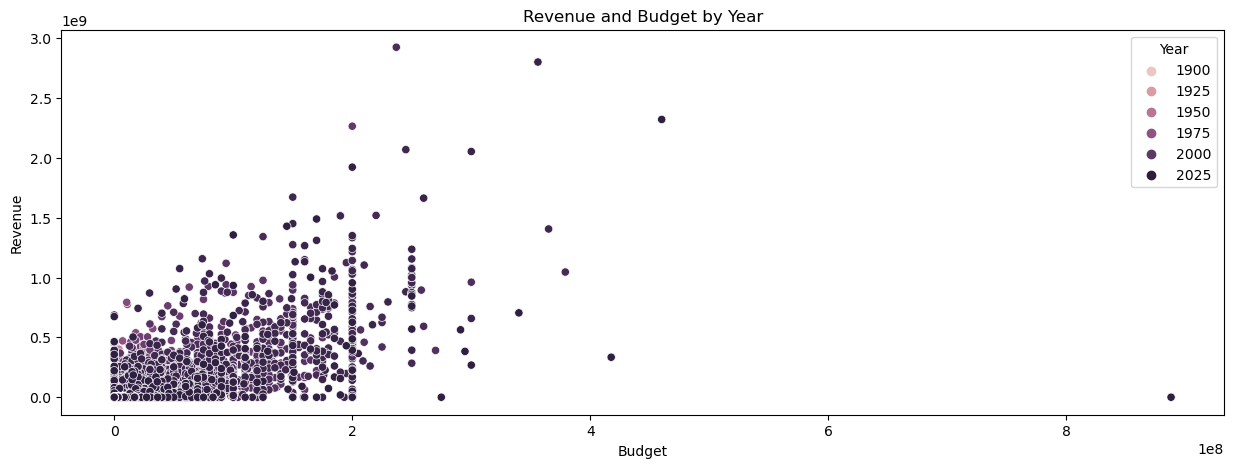

In [37]:
# Release Date and Budget

# Converting to date-time

df['release_date'] = pd.to_datetime(df['release_date'])

# Sorting df by Release Date

df = df.sort_values(by='release_date')

# Creating year column

df['Year'] = df['release_date'].dt.year

# Scatterplot

plt.figure(figsize=(15, 5))

sns.scatterplot(data=df, x='budget', y='revenue', hue='Year')

plt.title('Revenue and Budget by Year')

plt.xlabel('Budget')

plt.ylabel('Revenue')

plt.show()

With evolving technology films became increasingly more expensive to produce, and naturally this may have an impact on Revenue. In the graph above it is evident there are more movies being made in more recent years compared to previous decades. There seems to be a somewhat linear correlation between Budget and Revenue with a few outliers. The film with the highest budget ($888000000) is called Enea. It has no Vote Average, no Vote Count, no Revenue, and the Original Language is Italian. Though lacking feature data, it would be more surprising if it was a Marvel movie. 

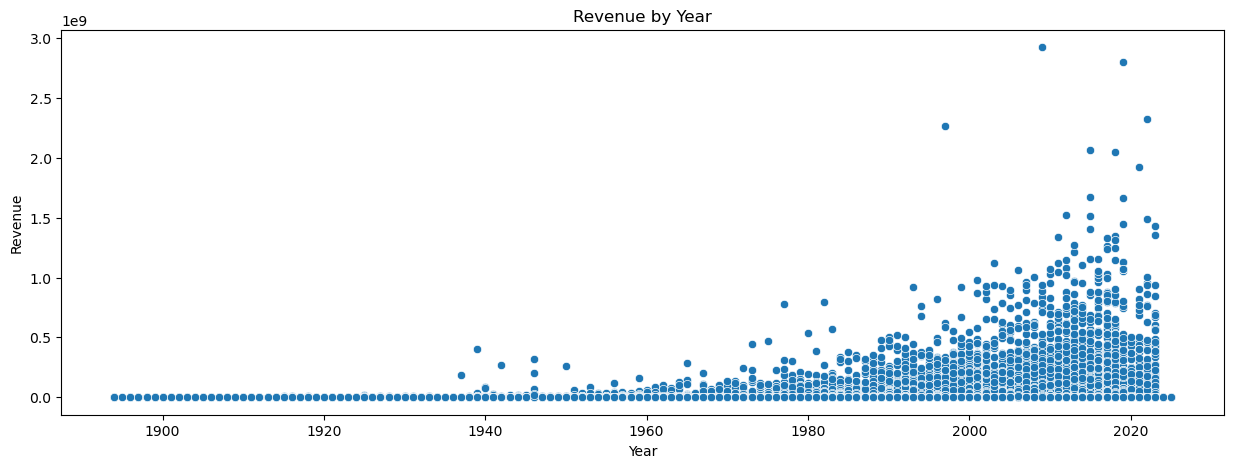

In [39]:
# Revenue

plt.figure(figsize=(15, 5))

sns.scatterplot(data=df, y='revenue', x='Year')

plt.title('Revenue by Year')

plt.xlabel('Year')

plt.ylabel('Revenue')

plt.show()

The Revenue for movies seems to increase exponentially over the decades. It would be interesting to see if Budget also shows any exponential growth, potentially in conjunction with Revenue. 

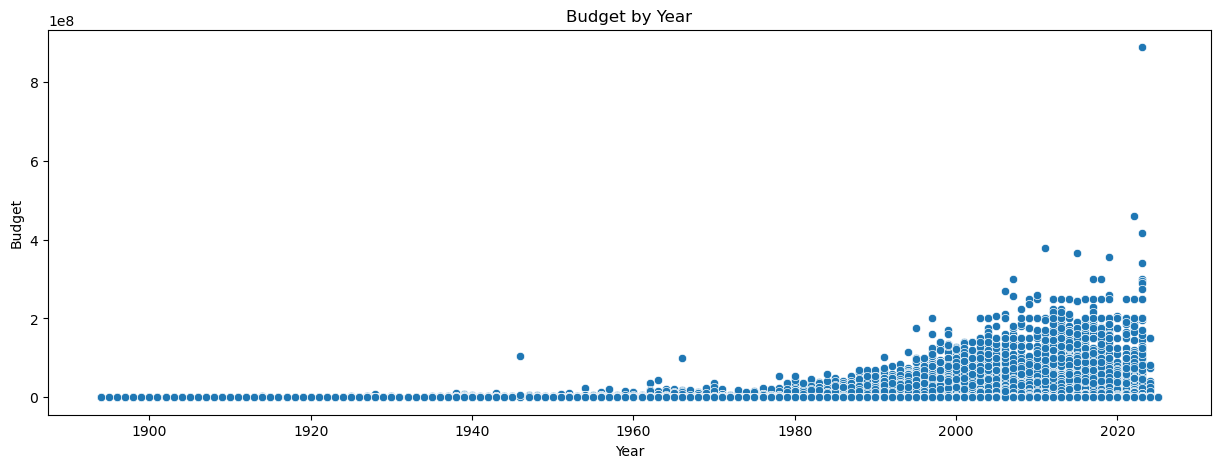

In [41]:
# Budget 

plt.figure(figsize=(15, 5))

sns.scatterplot(data=df, x='Year', y='budget')

plt.title('Budget by Year')

plt.xlabel('Year')

plt.ylabel('Budget')

plt.show()

Budget also shows growth over the decades. Budget and Revenue growing at the same time appears sensible, seeing as filmmaking is a business and most industry professionals invest in projects they expect to profit from, whether that means creating movies that naturally require lower budgets and will still be popular, or investing in projects that are expensive but can expect to make double what they cost. 

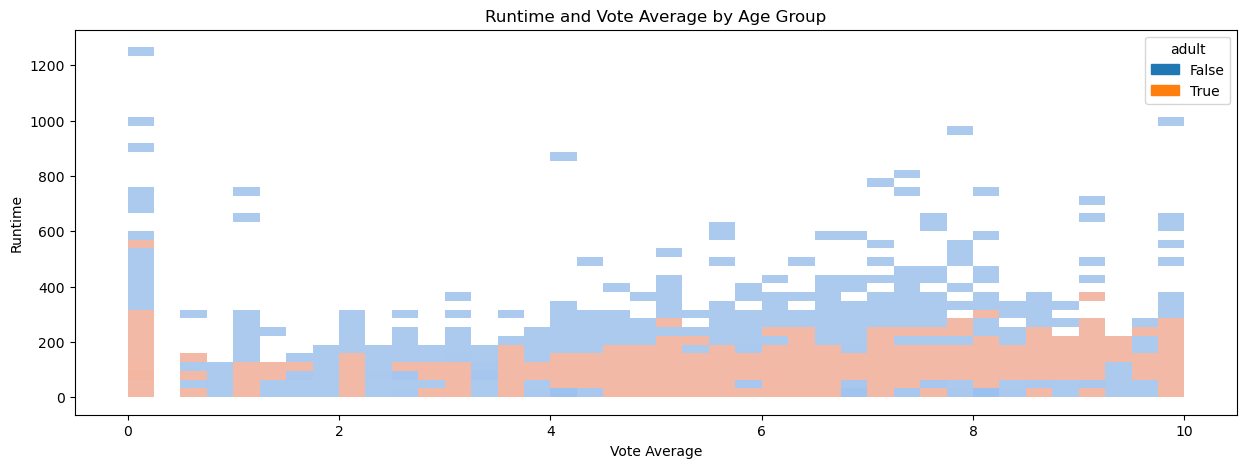

In [43]:
# Runtime 

plt.figure(figsize=(15, 5))

sns.histplot(data=df, y='runtime', x='vote_average', hue='adult', bins=40)

plt.title('Runtime and Vote Average by Age Group')

plt.xlabel('Vote Average')

plt.ylabel('Runtime')

plt.show()

The next feature of interest is Runtime. It would be interesting to see if Runtime has an impact on voting and subsequently Revenue. In the histogram plot, surprisingly, it seems there are more short films that are 'adult' and more long films that are not 'adult.' This is contrary to what intuitively seems sensible, as younger audiences have shorter attention spans and, generally, films geared towards them will likely be shorter. The graph demonstrates the inverse. Additionally, Vote Average seems to be skewed slightly towards the higher end with higher scores from adults and youth, with a lot of data gathered around 0. Though it may seem strange so many youth films would receive such low ratings, seeing as the age group of voters would intuitively be older, anything not 'adult' includes young adult films such as The Kissing Booth, which is a Rom-Com released on Netflix in 2018. This film has Revenue listed as 0, which appears wrong, but makes sense seeing as it was originally produced by Netflix and not widely distributed to the general public in theaters. The revenue is unknown.

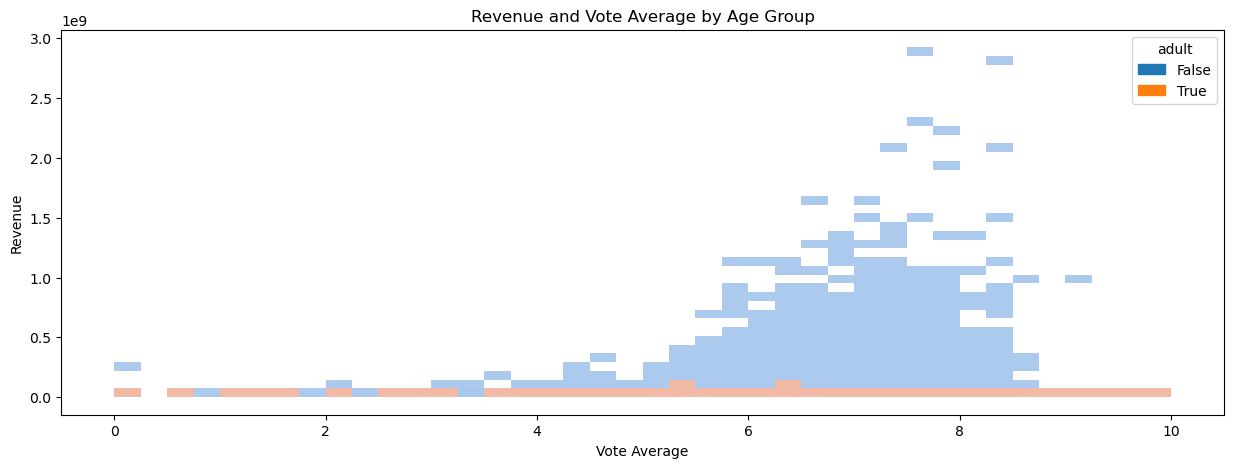

In [45]:
# Adult

plt.figure(figsize=(15, 5))

sns.histplot(data=df, x='vote_average', y='revenue', hue='adult', bins=40)

plt.title('Revenue and Vote Average by Age Group')

plt.xlabel('Vote Average')

plt.ylabel('Revenue')

plt.show()

Contrary to previous beliefs, it seems non-adult films recieve the highest voting scores and accumulate higher revenues. 

In [47]:
# Vote Count by Adult

df.groupby('adult')['vote_count'].sum()

adult
False    20627700
True         5739
Name: vote_count, dtype: int64

A quick look at the Vote Count clears this confusion, as non-adults make up the most voters in this data set. 

In [49]:
# Adult film count

df.groupby('adult')['title'].count()

adult
False    206329
True       1931
Name: title, dtype: int64

Additionally, non-adult films are the majority in this data set. Thus there is a clear skew in all of these features to non-adult films. 

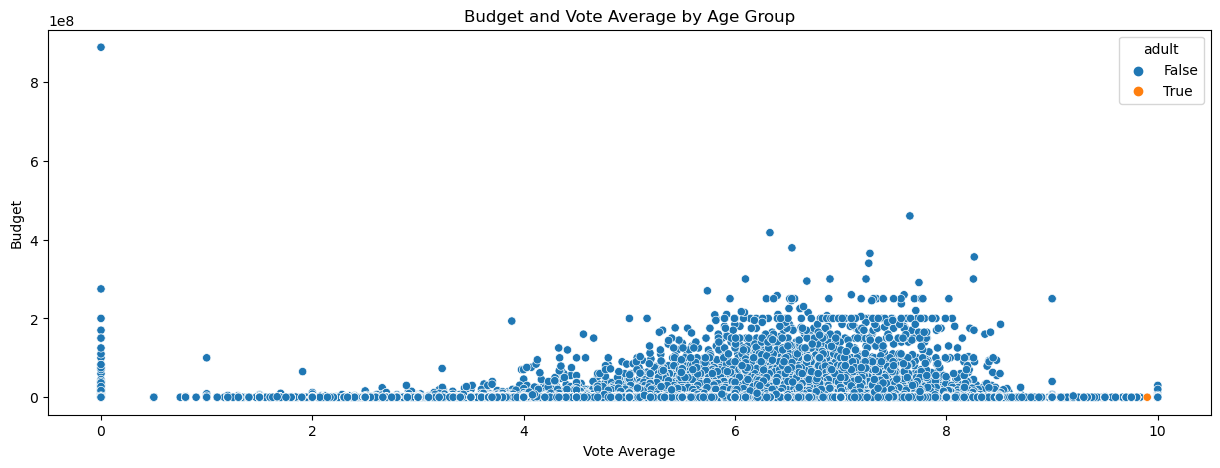

In [52]:
# Budget and Vote Average

plt.figure(figsize=(15, 5))

sns.scatterplot(data=df, x='vote_average', y='budget', hue='adult')

plt.title('Budget and Vote Average by Age Group')

plt.xlabel('Vote Average')

plt.ylabel('Budget')

plt.show()

Once again, the non-adult films dominate the plot with the adult films represented thinly underneath. It seems, at least in this data, non-adult films have the highest budgets and that translates to higher vote scores, save for several outliers.  

In [54]:
# Keeping first Production Country in lists

df['production_countries'] = df['production_countries'].str.split(',').str[0]

Production Countries could be interesting to analyze, but after taking a look at the data and how it is contructed, sometimes there are several countries listed for each film, which makes interpreting the data much harder compared to having single countries. For the purpose of the analysis I'll extract the first country in any lists. 

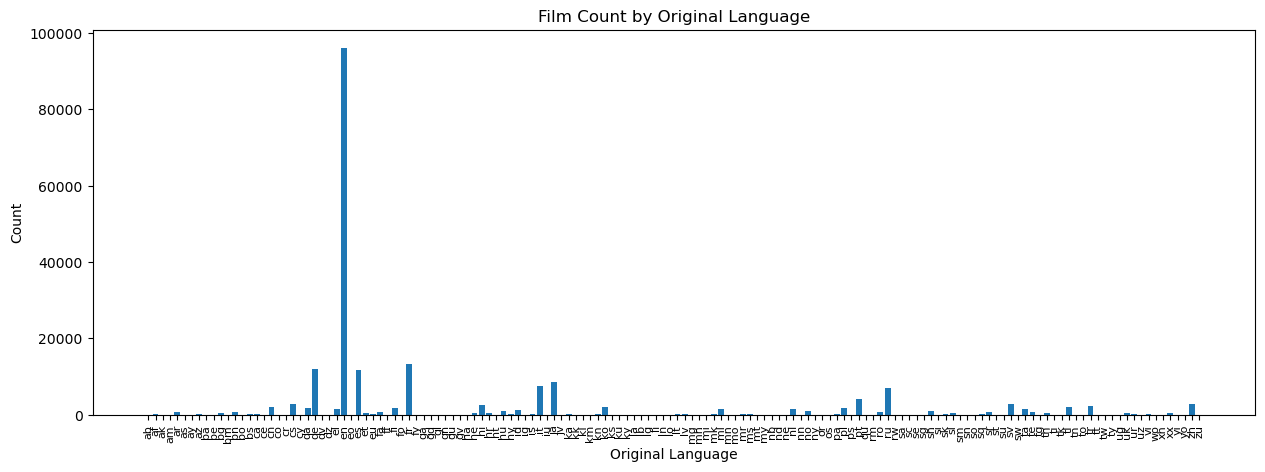

In [56]:
# Original Language 

# Group by language

ol_count = df.groupby('original_language')['title'].count().reset_index(name='Count')

# Bar plot

plt.figure(figsize=(15, 5))

plt.bar(data=ol_count, x='original_language', height='Count')

plt.title('Film Count by Original Language')

plt.xlabel('Original Language')

plt.xticks(rotation=90, size=8)

plt.ylabel('Count')

plt.show()

As predicted, English films dominate the dataset. Though this may translate to a biased dataset that leaves out other successful foreign films, the American film industry is the oldest and wealthiest in the world. The film with the highest Revenue in the dataset is Avatar ($2923706026). Therefore it is typical and unsurprising that American films, in English, would be overly represented and rank highly in terms of Revenue. It is predicatable that wealthier countries with more resources will likely have higher budgets.

In [58]:
# Top 10 Movies by Revenue

df.sort_values(['revenue'], ascending=False).head(10)

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,genres,production_companies,production_countries,directors,writers,Year
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,en,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...",United States of America,James Cameron,James Cameron,2009
15,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,False,356000000,en,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee,...",2019
282,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,False,460000000,en,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,James Cameron,"James Cameron, Rick Jaffa, Amanda Silver, Josh...",2022
17,Titanic,7.900,23637,1997-11-18,2264162353,194,False,200000000,en,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,James Cameron,James Cameron,1997
56,Star Wars: The Force Awakens,7.293,18352,2015-12-15,2068223624,136,False,245000000,en,"Adventure, Action, Science Fiction","Lucasfilm Ltd., Bad Robot",United States of America,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...",2015
6,Avengers: Infinity War,8.255,27713,2018-04-25,2052415039,149,False,300000000,en,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee,...",2018
57,Spider-Man: No Way Home,7.990,18299,2021-12-15,1921847111,148,False,200000000,en,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,Jon Watts,"Chris McKenna, Erik Sommers, Stan Lee, Steve D...",2021
44,Jurassic World,6.682,19414,2015-06-06,1671537444,124,False,150000000,en,"Action, Adventure, Science Fiction, Thriller","Amblin Entertainment, Universal Pictures",United States of America,Colin Trevorrow,"Rick Jaffa, Amanda Silver, Colin Trevorrow, De...",2015
317,The Lion King,7.100,9325,2019-07-12,1663075401,118,False,260000000,en,"Adventure, Drama, Family","Walt Disney Pictures, Fairview Entertainment",United States of America,Jon Favreau,"Jeff Nathanson, Irene Mecchi, Jonathan Roberts...",2019
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,en,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,Joss Whedon,"Joss Whedon, Zak Penn",2012


As depicted above, even the top 10 films with the highest revenues are produced in America, in English, and are popular IP with established audiences. The second Avatar film is high in the list along with several Marvel Studio movies. Thus, the heavy bias to Western media is warranted. Interestingly, Titanic is not considered an adult movie. It is rated PG-13. It appears that the label 'adult' is given to films based on these ratings and not necessarily who the film targets. 

In [60]:
# Production Companies

df['production_companies'].nunique()

115572

There are many production companies included in this dataset. Some movies list the collaborations of several production companies, which makes the data harder to interpret, similar to Production Countries. However, this feature would be worthwhile exploring because the differences between production companies likely play a key role in predicting Revenue and film popularity. Larger film industries would likely translate to higher revenues. It is compelling to discover whether production company plays a vital role in the dynamic between Budget and Revenue. 

In [62]:
# Top 10 Production Companies

df.groupby('production_companies').count().sort_values(['revenue'], ascending=False).head(10)

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,genres,production_countries,directors,writers,Year
production_companies,,,,,,,,,,,,,,
Metro-Goldwyn-Mayer,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
Columbia Pictures,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509
Paramount,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
Warner Bros. Pictures,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131
Universal Pictures,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089
Mosfilm,979,979,979,979,979,979,979,979,979,979,979,979,979,979
20th Century Fox,909,909,909,909,909,909,909,909,909,909,909,909,909,909
RKO Radio Pictures,868,868,868,868,868,868,868,868,868,868,868,868,868,868
Republic Pictures,812,812,812,812,812,812,812,812,812,812,812,812,812,812


As depicted in the table above, the majority of the top 10 production companies that have released the most films in this dataset are American. This is with the exception of Mosfilm (Russian) and Toei Company (Japanese). 

In [64]:
# Keeping first production company 

df['production_companies'] = df['production_companies'].str.split(',').str[0]

For the purposes of the models only the first production company in any lists will be included.

In [66]:
# Genres 

df['genres'].nunique()

8867

In [68]:
# Extracting the first genre from lists of genres

df['genres'] = df['genres'].str.split(',').str[0]

The Genres feature in the data set is also expansive with many films listing several genres. For the purposes of this analysis, and to keep the data easier to interpret, only the first genre for these films will be counted. This is under the assumption that the first listed genre is the primary genre of the respective film. 

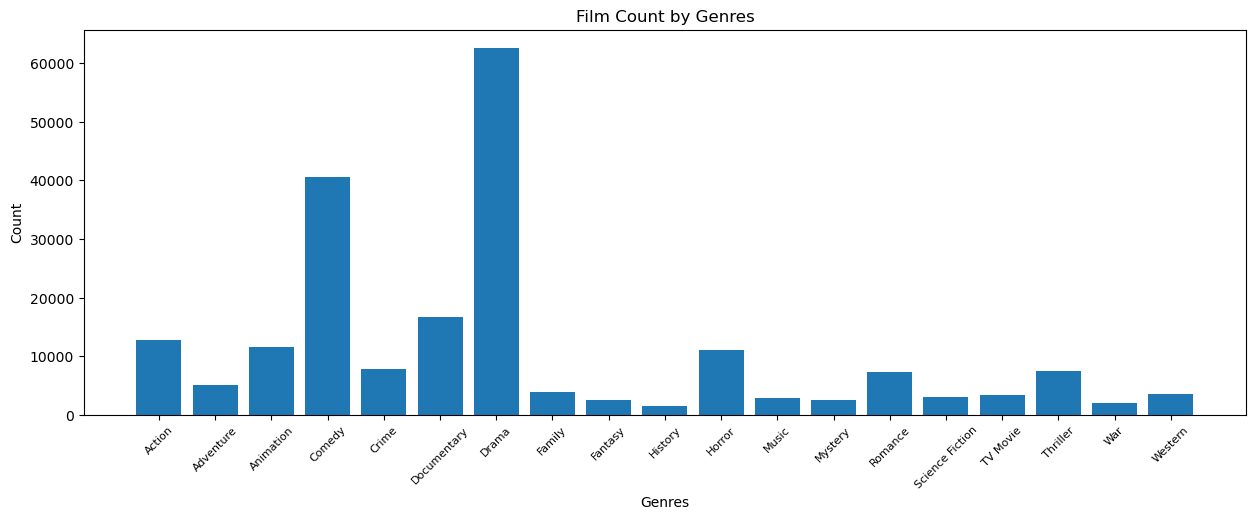

In [69]:
# Genres

# Groupby Genre

by_gen = df.groupby('genres')['title'].count().reset_index(name='Count')

# Bar plot

plt.figure(figsize=(15, 5))

plt.bar(data=by_gen, x='genres', height='Count')

plt.title('Film Count by Genres')

plt.xlabel('Genres')

plt.xticks(rotation=45, size=8)

plt.ylabel('Count')

plt.show()

As detailed in the bar plot above, Drama and Comedy are the most represented Genres. This is not to say they are the most successful Genres, only that they have the most films labelled as such in the dataset. If one was looking at film success by Revenue, then Action, Adventure and Science Fiction would be the top Genres.  

In [71]:
# Top 10 films by Vote Average

df.sort_values(['vote_average'], ascending=False).head(10)

,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,genres,production_companies,production_countries,directors,writers,Year
267165,Ghost Rockers voor Altijd,10.0,1,2016-12-21,0,92,False,0,en,Adventure,Studio 100,Belgium,Gert-Jan Booy,"Hans Bourlon, Bjorn Van den Eynde, Gert Verhulst",2016
268358,Yaar Annmulle 2,10.0,1,2016-12-23,0,119,False,0,pa,Drama,Batra Showbiz,India,Sunny Mahal,Mani Manjinder Singh,2016
242285,Alien Encounter at Loch Ness,10.0,1,2014-01-01,0,75,False,0,en,Documentary,Reality Entertainment,United States of America,Philip Gardiner,Warren Croyle,2014
214092,Belladonna,10.0,1,1981-10-31,0,90,False,0,da,Drama,Thura Film,Denmark,Jytte Rex,Jytte Rex,1981
228740,Rien ne peut t'arrêter,10.0,1,2014-01-01,0,15,False,0,fr,Science Fiction,Affreux,France,David Hourrègue,"David Hourrègue, Loïc Nicoloff",2014
232233,Nerdy Prudes Must Die,10.0,1,2023-02-16,0,148,False,0,en,Horror,Starkid Productions,United States of America,"Nick Lang, Curt Mega","Matt Lang, Nick Lang",2023
238829,Life in Darkness,10.0,1,2014-05-05,0,12,False,0,en,Thriller,UCF Film,United States of America,Mike Collins,Mike Collins,2014
220618,Dominic Bane,10.0,1,2024-03-27,0,150,False,20000,en,Action,Silva Pictures,United States of America,Matthew Silva,"Aniel Rios, Matthew Silva",2024
235148,Sous le nuage d'Hiroshima,10.0,1,2015-07-06,0,0,False,0,fr,Documentary,Nilaya Productions,France,Bertrand Collard,Bertrand Collard,2015
221270,"The Quran, The Origins Of The Book",10.0,1,2009-01-01,0,52,False,0,fr,Documentary,13 Prods,France,Bruno Ulmer,Bruno Ulmer,2009


Interestingly, if one was looking at film success by Vote Average, then the movies in the table above would rank first. However, the Vote Count is very low and the Revenue for all is listed at 0, so this is not a very faithful representation of the general public's opinions. The Genres for the films above also vary greatly and a lot of them are foreign films. This means that Vote Average, for this dataset, may not be a very good measure of film success compared to Revenue. 

In [73]:
# Choosing first director in Directors

df['directors'] = df['directors'].str.split(',').str[0]

Similarly to Genres, there are multiple directors for some films. For the purposes of the analysis, only the first director in any lists will be chosen. This is under the assumption that the first listed director is the most relevant. 

In [75]:
# Choosing the first writer in Writers

df['writers'] = df['writers'].str.split(',').str[0]

Only the first writer in Writers will be chosen for the same reason stated above. It is unlikely the general public is making film choices based on their favourite Writers, at least comared to Directors and Production Companies, but it would be interesting to see how the following models use this additional information. 

In [77]:
# Correlations

df_corr = df.corr(numeric_only=True)

df_corr

,vote_average,vote_count,revenue,runtime,adult,budget,Year
vote_average,1.000000,0.112796,0.075054,0.227170,-0.010535,0.085264,0.092036
vote_count,0.112796,1.000000,0.773161,0.106731,-0.012590,0.649792,0.064173
revenue,0.075054,0.773161,1.000000,0.085781,-0.008508,0.744311,0.050551
runtime,0.227170,0.106731,0.085781,1.000000,0.037249,0.109921,0.114290
adult,-0.010535,-0.012590,-0.008508,0.037249,1.000000,-0.012251,0.014727
budget,0.085264,0.649792,0.744311,0.109921,-0.012251,1.000000,0.073745
Year,0.092036,0.064173,0.050551,0.114290,0.014727,0.073745,1.000000


<Axes: >

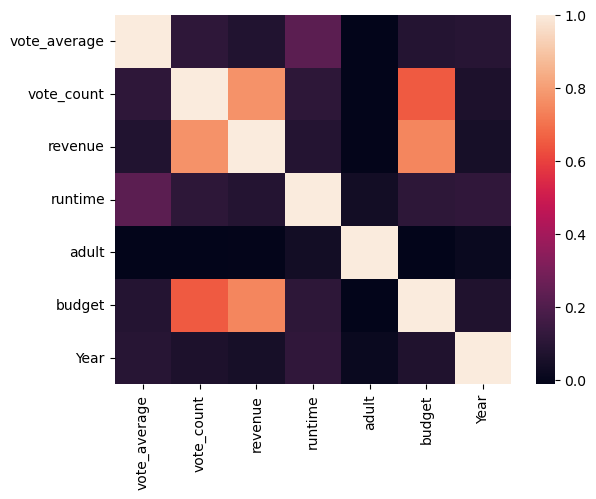

In [78]:
# Heatmap 

sns.heatmap(data=df_corr)

Not so surprisingly, Budget, after Vote Count, has the highest correlation with Revenue. Expensive films do not always necessarily translate to more profit, but typically films with more resources and special effects will result in more buzz and subsequently greater audience engagement. 

In [80]:
# Removing Vote Count outliers 

out_low = df['vote_count'].quantile(0.01)

df_filtered = df[(df['vote_count'] > out_low)]

df_corr2 = df_filtered.corr(numeric_only=True)

df_corr2

,vote_average,vote_count,revenue,runtime,adult,budget,Year
vote_average,1.000000,0.099541,0.064616,0.056359,0.044762,0.057468,0.057744
vote_count,0.099541,1.000000,0.772589,0.111987,-0.013014,0.664711,0.069619
revenue,0.064616,0.772589,1.000000,0.092656,-0.008771,0.762593,0.055508
runtime,0.056359,0.111987,0.092656,1.000000,0.034018,0.119832,0.127346
adult,0.044762,-0.013014,-0.008771,0.034018,1.000000,-0.012868,0.011419
budget,0.057468,0.664711,0.762593,0.119832,-0.012868,1.000000,0.081203
Year,0.057744,0.069619,0.055508,0.127346,0.011419,0.081203,1.000000


Even after removing the outliers on the lower end for Vote Count there is no correlation improvement between Vote Average and Revenue. Therefore the outliers will be re-introduced to the dataset since these films makes little difference to the data statistics.

In [82]:
# Dropping large features

df3 = df.drop(['title', 'release_date', 'production_companies', 'directors', 'writers'], axis=1)

After reducing features with lists, there are still too many unique values in some features that would make encoding and model building too complex. Some features have over 60,000 unique values. Reducing the number of values by substituting other values would compromise the integrity of the data. Therefore these features will be removed entirely. 

In [84]:
df3[df3['revenue'] == 0 ].count()

vote_average            193683
vote_count              193683
revenue                 193683
runtime                 193683
adult                   193683
budget                  193683
original_language       193683
genres                  193683
production_countries    193683
Year                    193683
dtype: int64

In [85]:
# Dropping films with Revenue of 0 but Vote Average > 0

df3 = df3.drop(df3[(df3['revenue'] == 0) & (df3['vote_average'] > 0)].index)

Lastly, as depicted in the table above, there are many films with 0 reported as the revenue. As seen with the Netflix movie The Kissing Booth, which has a Vote Average of 7, this does not intuitively seem sensible. A film typically does not have a good Vote Average but no profit. For more predictive reliability, I am removing any films that have 0 as Revenue but have Vote Average greater than 0. 

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63928 entries, 305791 to 362358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          63928 non-null  float64
 1   vote_count            63928 non-null  int64  
 2   revenue               63928 non-null  int64  
 3   runtime               63928 non-null  int64  
 4   adult                 63928 non-null  bool   
 5   budget                63928 non-null  int64  
 6   original_language     63928 non-null  object 
 7   genres                63928 non-null  object 
 8   production_countries  63928 non-null  object 
 9   Year                  63928 non-null  int32  
dtypes: bool(1), float64(1), int32(1), int64(4), object(3)
memory usage: 4.7+ MB


Next, there are several object features that need to be encoded before building models. 

In [89]:
# Encoding features

encoder = OneHotEncoder(drop='first', sparse_output = False)

encode_cols = encoder.fit_transform(df3[['original_language', 'genres', 'production_countries', 'adult', 'Year']])

new_df = pd.DataFrame(encode_cols, columns= encoder.get_feature_names_out(['original_language', 'genres', 'production_countries', 'adult', 'Year']))

df3 = df3.drop(columns=['original_language', 'genres', 'production_countries', 'adult', 'Year']).join(new_df)


In [90]:
# Removing NaNs 

df3 = df3.fillna(0)

After encoding features there seem to be NaN values. They will be turned into 0s. 

Several classification models will be used to interpret the movie dataset and classify new data. Since Revenue has no discrete classes, only unsupervised models will be used. This is under the assumption that movies with similar feature values will cluster together and that, by virture of being sorted in the same cluster, the models will reveal how the new film can expect to perform in the film market.

## Model 1: KMeans Clustering

In [94]:
# Scale data 

scaler = StandardScaler()

x = scaler.fit_transform(df3)

Since the numerical data are all of varying sizes, the data must be scaled. 

In [96]:
# PCA to select top features

pca = PCA(n_components=5)

x_pca = pca.fit_transform(x)

print(x_pca)

[[-1.28333218e+00  4.68432367e-01  1.16423298e-01  6.75237065e-03
  -8.07491577e-04]
 [-1.27943396e+00  4.66302678e-01  1.15846449e-01  6.73851044e-03
  -8.01578712e-04]
 [-1.27943396e+00  4.66302678e-01  1.15846449e-01  6.73851044e-03
  -8.01578712e-04]
 ...
 [-9.32493170e-01  2.76760322e-01  6.45068742e-02  5.50495163e-03
  -2.75333648e-04]
 [-1.28333218e+00  4.68432367e-01  1.16423298e-01  6.75237065e-03
  -8.07491577e-04]
 [-9.32493170e-01  2.76760322e-01  6.45068742e-02  5.50495163e-03
  -2.75333648e-04]]


After encoding the data, it is evident there are many more features. PCA will be used to reduce dimensionality. 

In [98]:
# K loop

sse = []  

for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

A K-loop is used to find the optimal value for n. 

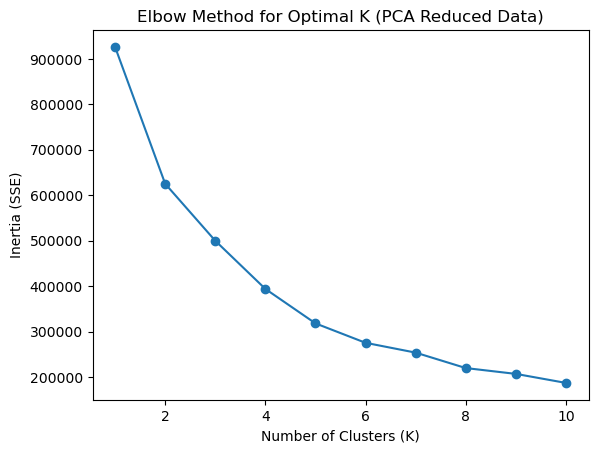

In [100]:
# Elbow graph

plt.plot(range(1, 11), sse, marker='o')

plt.xlabel('Number of Clusters (K)')

plt.ylabel('Inertia (SSE)')

plt.title('Elbow Method for Optimal K (PCA Reduced Data)')

plt.show()

As demonstrated in the graph above, the line seems to curve at the 3 or 4 marks. 

In [102]:
# Fitting model

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')

kmeans.fit(x_pca)

labels = kmeans.labels_

In [103]:
# Adding model cluster labels to dataframe

df3['Clusters'] = labels

df3['Clusters'] = df3['Clusters'].astype(str)

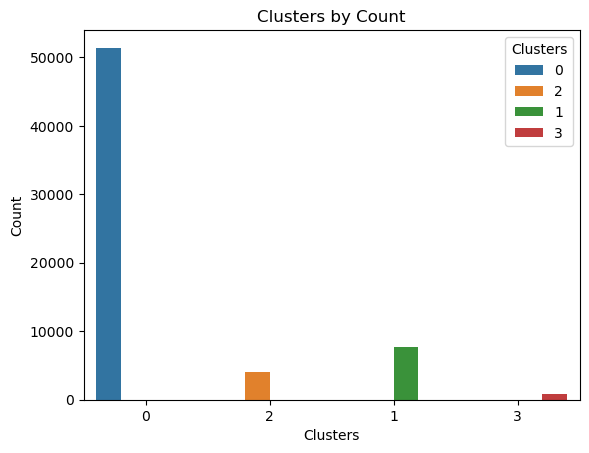

In [104]:
# Cluster distribution

sns.countplot(x=df3['Clusters'], hue=df3['Clusters'])

plt.title('Clusters by Count')

plt.ylabel('Count')
          
plt.show()

There seem to be an overwhelming majority of the data points in cluster 0 with very few points in cluster 1. 

In [106]:
# Top revenue by cluster

revenue_by_cluster = df3.groupby('Clusters')['revenue'].mean().sort_values(ascending=False)

revenue_by_cluster

Clusters
3    4.310364e+08
1    3.872693e+07
2    1.505903e+07
0    1.276900e+05
Name: revenue, dtype: float64

The top clusters in terms of Revenue are clusters 1 and 3. This makes more sense why cluster 1 is so small. Cluster 1 likely includes rare film successes like Avatar and the rest of the top 10 films by Revenue mentioned previously. 

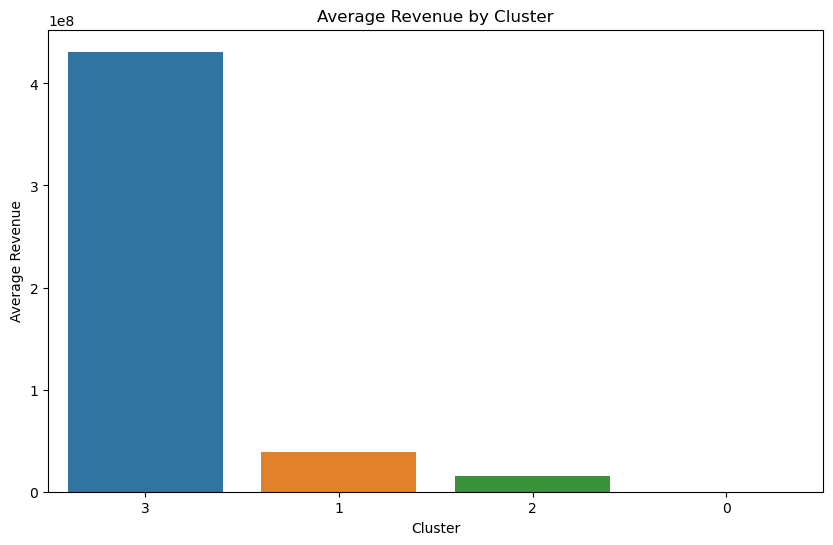

In [108]:
# Revenue by cluster 

plt.figure(figsize=(10, 6))

sns.barplot(x= revenue_by_cluster.index, y=revenue_by_cluster.values)

plt.xlabel('Cluster')

plt.ylabel('Average Revenue')

plt.title('Average Revenue by Cluster')

plt.show()

The vast disparity between the cluster mean Revenue is demonstrated in the graph above. Though cluster 3 is the smallest, the few data points, in relation to the other clusters, have very high revenues.

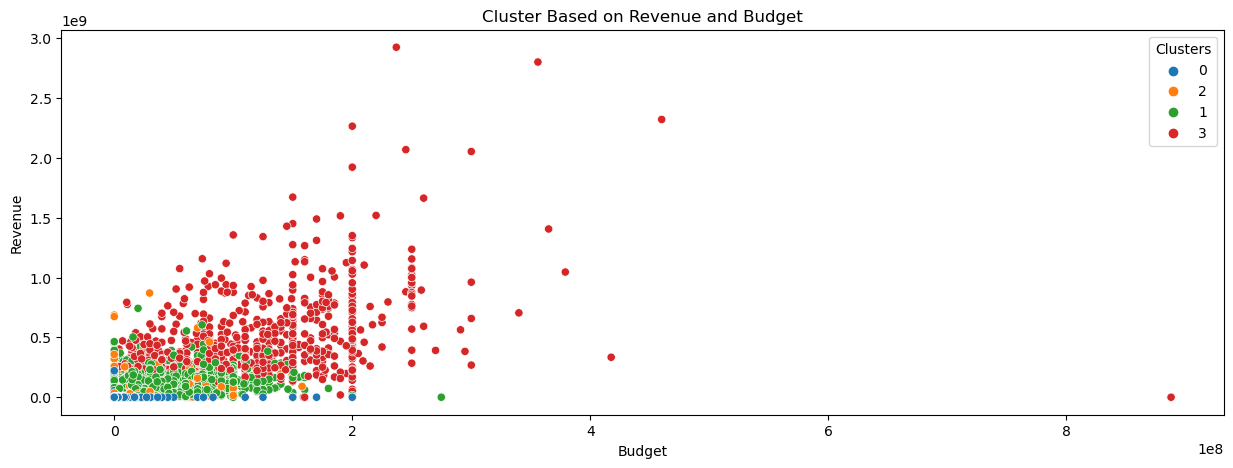

In [110]:
# Revenue vs. Budget

plt.figure(figsize=(15, 5))

sns.scatterplot(data= df3, x= df3['budget'], y= df3['revenue'],hue= df3['Clusters'])

plt.title('Cluster Based on Revenue and Budget')

plt.xlabel('Budget')

plt.ylabel('Revenue')

plt.show()

The seems to be a strong correlation between Budget and Revenue within the clusters. Cluster 0, the most populated cluster, typically has lower revenues and a mid-range spread of budgets relative to the majority of the data points. Cluster 1, with the second highest average Revenue, includes films with higher revenues and similar smaller budgets. Cluster 2 has films with similar, only some higher revenues and similar budgets as the previous clusters. Meanwhile, cluster 3, the smallest populated cluster, has astronomical revenues and budgets in comparison. Though it appears to dominate the scatterplot above, it has only a fraction of the data points of the largest cluster (0). It is clear any films in cluster 3 are runaway successes, and, judging by the linear correlation between Revenue and Budget, can certainly be thought to be pre-planned successes, including any popular IP and sequels of popular films. 

In [112]:
# Clusters by mean Vote Average

df3.groupby(['Clusters'])['vote_average'].mean().sort_values(ascending=False)

Clusters
3    7.042172
1    6.412444
2    6.228879
0    0.201209
Name: vote_average, dtype: float64

In this model there seems to be some consideration of Vote Average when classifying films. The cluster with the highest mean Revenue also has the highest Vote Average. The cluster with the lowest mean Revenue has the lowest Vote Average. 

In [114]:
# Clusters by Runtime 

df3.groupby(['Clusters'])['runtime'].mean().sort_values(ascending=False)

Clusters
3    120.478697
1    108.025042
2    105.915503
0     60.535372
Name: runtime, dtype: float64

There also seems to be thought given to Runtime, with the highest average runtime for cluster 3 even though it has the lowest number of data points. There is a significant gap from cluster 3's runtime to the lowest average Runtime in cluster 0, which happens to include the majority of the films. 

## Model 2: DBSCAN

In [117]:
# Scale data 

x = scaler.fit_transform(x)

In [118]:
# X PCA 

x_pca2 = pca.fit_transform(x)

print(x_pca2)

[[-1.28328414  0.4689418   0.1096026  -0.02020729 -0.00642716]
 [-1.27938612  0.46680569  0.10905876 -0.02010396 -0.00637971]
 [-1.27938612  0.46680569  0.10905876 -0.02010396 -0.00637971]
 ...
 [-0.93246221  0.27669187  0.06065677 -0.01090698 -0.00215711]
 [-1.28328414  0.4689418   0.1096026  -0.02020729 -0.00642716]
 [-0.93246221  0.27669187  0.06065677 -0.01090698 -0.00215711]]


There are a lot of features considered. In order to reduce dimensionality I will use PCA again.

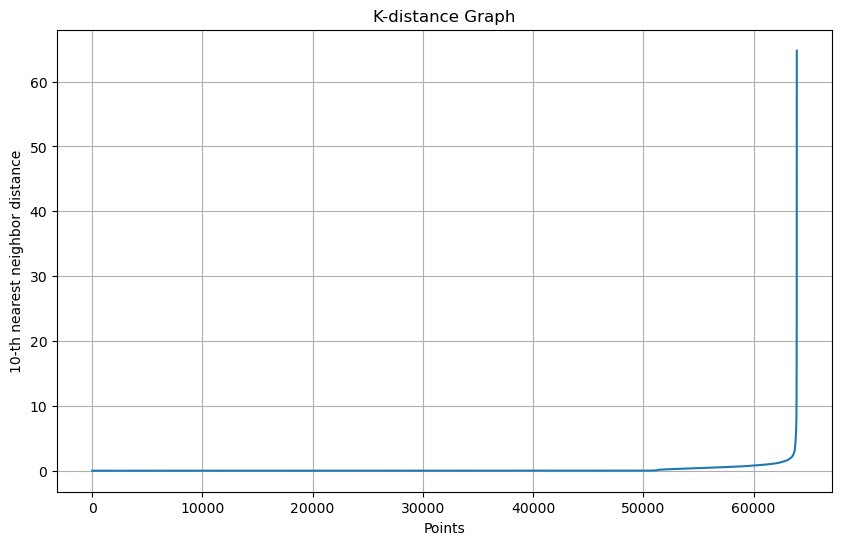

In [120]:
# K distance graph to find epsilon value

def plot_k_distance_graph(x_pca, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(x_pca2)
    distances, _ = neigh.kneighbors(x_pca2)
    distances = np.sort(distances[:, k-1])

    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.grid()
    plt.title('K-distance Graph')
    plt.show()

# Graph plot

plot_k_distance_graph(x_pca2, k=10)

It appears as thought the elbow of the graph is very low, ranging from 0 to 1 for the epsilon value. This is based on a model with n_neighbors set to 10, which is double the number of features chosen in the PCA stage (5). However choosing other values for K (5, 15, 20) does not seem to change the elbow's position.  

In [122]:
# Initiating model

dbscan = DBSCAN(eps=1, min_samples=10)

The minimum samples is higher for more dense clusters and a larger dataset. 

In [124]:
# Fitting data

dbscan.fit(x_pca2)

DBSCAN(eps=1, min_samples=10)

In [125]:
# Labels 

labels = dbscan.labels_

In [126]:
# Adding cluster labels to dataframe

df3['Clusters DBSCAN'] = labels

df3['Clusters DBSCAN'] = df3['Clusters DBSCAN'].astype(str)

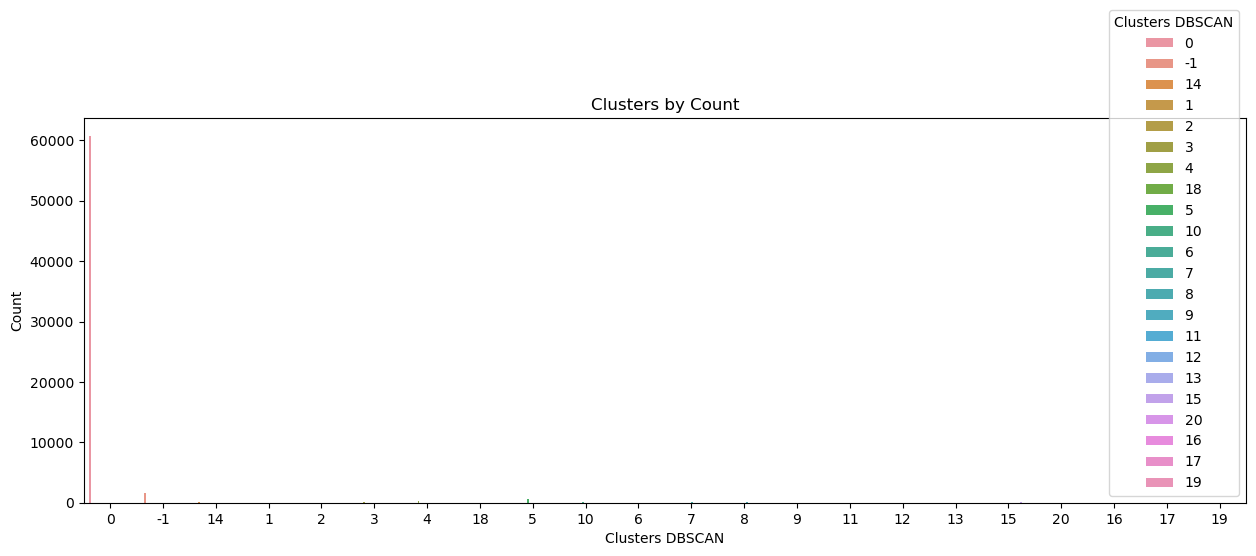

In [127]:
# Cluster counts plot

plt.figure(figsize=(15, 5))

sns.countplot(x=df3['Clusters DBSCAN'], hue=df3['Clusters DBSCAN'])

plt.title('Clusters by Count')

plt.ylabel('Count')
          
plt.show()

As demonstrated in the graph above, an overwhelming majority of data points are in cluster 0. 

In [129]:
# Cluster counts

df3.groupby('Clusters DBSCAN')['Clusters DBSCAN'].count().sort_values(ascending=False)

Clusters DBSCAN
0     60699
-1     1583
5       636
4       218
8       194
7        99
3        98
10       68
15       49
14       43
1        32
6        32
2        31
13       29
17       21
18       20
12       19
9        18
11       13
20       10
19        8
16        8
Name: Clusters DBSCAN, dtype: int64

Upon looking at the raw numbers above, it is clear most of the data is being sorted into cluster 0. Addtionally, compared to the previous model, this model has identified over 20 clusters, where some are much smaller in size than others, and the majority of them are roughly the same size. 

In [131]:
# Revenue by cluster

dbscan_rev = df3.groupby('Clusters DBSCAN')['revenue'].mean().sort_values(ascending=False).reset_index(name='Mean Revenue')

dbscan_rev

,Clusters DBSCAN,Mean Revenue
0,17,2.586395e+08
1,19,1.503230e+08
2,-1,1.482395e+08
3,20,3.166868e+07
4,4,2.068840e+07
5,7,1.744382e+07
6,8,1.739080e+07
7,5,1.394280e+07
8,1,1.244027e+07
9,11,1.121747e+07


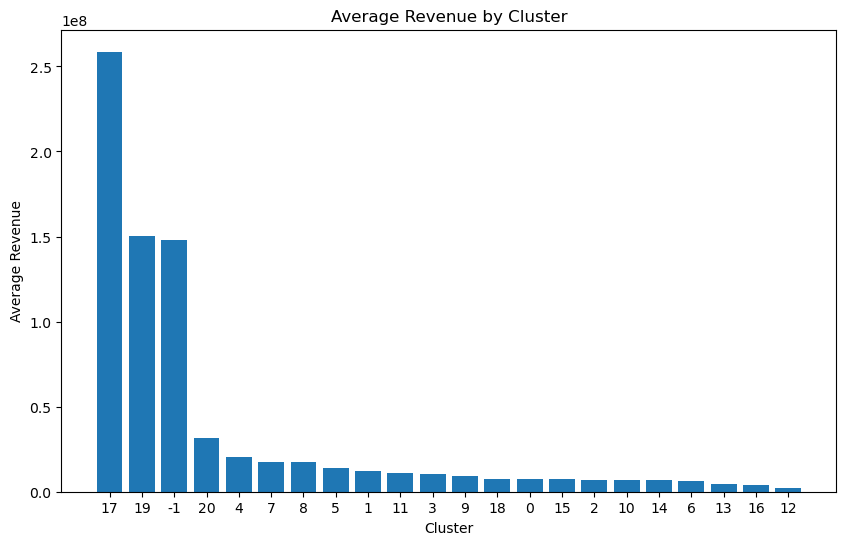

In [133]:
# Mean Revenue by cluster 

plt.figure(figsize=(10, 6))

plt.bar(x=dbscan_rev['Clusters DBSCAN'], height= dbscan_rev['Mean Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Average Revenue')

plt.title('Average Revenue by Cluster')

plt.show()

The cluster with the largest mean Revenue is cluster 17, which is one of the smaller clusters. This is similar to the previous model and likely includes very successful films that are above average. Interestingly, cluster 19 and -1 have averages that are more than half of cluster 17. This is vastly different from the KMeans model, which classified films into very distinct Revenue categories (either very high Revenue or very low). This model appears to classify films into varying degrees of Revenue, with a large decline from clusters 19 and -1 to cluster 20, and a steady drop off after.  

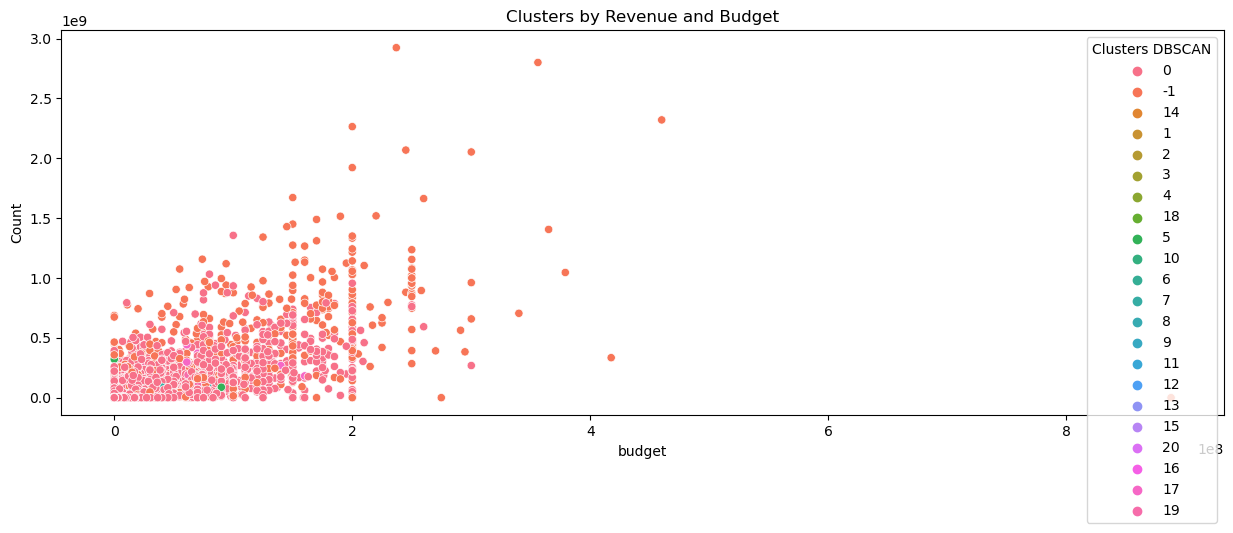

In [135]:
# Cluster by Revenue and Budget

plt.figure(figsize=(15, 5))

sns.scatterplot(x=df3['budget'], y=df3['revenue'], hue=df3['Clusters DBSCAN'])

plt.title('Clusters by Revenue and Budget')

plt.ylabel('Count')
          
plt.show()

Interestingly, unlike the previous model where extremely successful films (with a linear correlation between Budget and Revenue) were all sorted into the cluster with the highest Revenue average (cluster 3), this model has sorted these breakaway films into cluster -1, the cluster with only the third highest mean Revenue. 

In [137]:
# Clusters by mean vote_average

df3.groupby(['Clusters DBSCAN'])['vote_average'].mean().sort_values(ascending=False)

Clusters DBSCAN
19    7.200500
17    6.742810
6     6.462844
16    6.416250
8     6.396577
13    6.379552
-1    6.374656
7     6.353677
3     6.346163
10    6.317956
14    6.310233
5     6.299366
4     6.286372
20    6.247700
1     6.243656
18    6.241350
11    6.206385
15    6.192776
2     6.171677
12    6.169842
9     6.059556
0     1.151305
Name: vote_average, dtype: float64

Compared to the previous model, there is little differentiation in mean Vote Average between over half of the clusters. The previous model handles this more efficiently by sorting films into fewer clusters but still with obvious distinctions. 

In [139]:
# Clusters by Runtime

df3.groupby(['Clusters DBSCAN'])['runtime'].mean().sort_values(ascending=False)

Clusters DBSCAN
19    134.000000
17    122.904762
-1    110.929248
14    110.883721
3     109.153061
15    108.102041
8     107.876289
2     107.677419
20    107.400000
18    106.950000
13    106.931034
4     106.568807
5     106.422956
10    105.985294
16    105.375000
9     105.111111
6     105.062500
7     104.000000
1     103.156250
12    100.368421
11     96.615385
0      67.780870
Name: runtime, dtype: float64

Runtime does not seem to be a significant factor in film classification either. There are slight differences in the smaller clusters, with the largest gaps being between clusters 19, 17, and -1. All of which happen to have the highest average revenues of all the clusters. However, it is still unclear what differentiates these clusters. 

In [229]:
# Cluster 19

df3[df3['Clusters DBSCAN'] == '19']

,vote_average,vote_count,revenue,runtime,budget,original_language_af,original_language_am,original_language_ar,original_language_as,original_language_az,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Clusters,Clusters DBSCAN
787,8.004,5240,116112375,179,50000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
1247,7.166,3554,215294342,165,110000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
908,6.744,4635,281929795,97,25000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
830,7.567,5049,120673227,139,40000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
906,7.373,4637,127944208,109,53000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
597,7.000,6267,44516999,121,30000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
902,6.705,4652,190400157,121,62000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19
858,7.045,4896,105713218,141,70000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19


Cluster 19, a cluster with a higher mean Revenue in this model, includes a lot of films the KMeans model sorted into its cluster 1, a cluster with the second-highest mean Revenue, but still very low in comparison to cluster 3. Therefore there is some differentiation between the models in this regard. 

In [231]:
# Cluster 17

df3[df3['Clusters DBSCAN'] == '17']

,vote_average,vote_count,revenue,runtime,budget,original_language_af,original_language_am,original_language_ar,original_language_as,original_language_az,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Clusters,Clusters DBSCAN
487,7.200,7152,411348924,126,35000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
470,7.355,7316,211343479,83,40000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
1280,6.888,3475,352927224,127,49000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
912,4.331,4625,238207122,125,125000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
617,7.169,6198,206071502,105,100000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
729,6.672,5512,330444045,108,55000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
756,5.500,5392,245360480,138,137000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
853,6.598,4924,273339556,147,130000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
533,7.761,6707,123218424,125,70000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17
760,6.551,5367,371600000,118,70000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17


Cluster 17 is more similar to the previous model, as both models have sorted these films into the cluster with the highest mean Revenue. 

In [233]:
# Cluster -1

df3[df3['Clusters DBSCAN'] == '-1']

,vote_average,vote_count,revenue,runtime,budget,original_language_af,original_language_am,original_language_ar,original_language_as,original_language_az,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Clusters,Clusters DBSCAN
28505,6.300,48,8000000,85,200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-1
42374,6.700,25,2400000,84,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-1
55670,6.100,16,1250000,103,433000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,-1
14364,7.700,146,39448,333,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-1
44867,6.457,23,1000000,69,151666,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61956,7.679,14,47400000,92,30000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,-1
300202,0.000,0,0,115,888000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,-1
413464,0.000,0,0,206,170000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1
329636,0.000,0,0,105,274800000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1


In comparision, Cluster -1 is where the models differ. Though these films have been sorted into a cluster with the third highest mean Revenue, the KMeans model sorted these films into varying clusters with varying mean revenues. 

## Final Model Predictions

The best model for this analysis appears to be the KMeans model. Since the feature of interest is primarily Revenue and what other features could indicate higher profit, having over 20 clusters is not necessary, especially when the DBSCAN model has over half of the clusters with the same mean Revenue. These films could sensibly be in the same cluster. The KMeans model handles this more efficiently with clear Revenue distinctions between fewer clusters, and even demonstrates relevant patterns in Vote Average and Budget between the clusters.

In [239]:
# Generating new data 

# Df values 

df_vals = [[7, 1000, 1000000, 120, 500000]]

# Column names

df_pred = pd.DataFrame(df_vals, columns=[
'vote_average',
 'vote_count',
 'revenue',
 'runtime',
 'budget'])

For the predictive data, this film has a Vote Average of 7 from a 1000 Vote Count. It has a budget of half a million with double made in revenue, and runs for 120 minutes. 

In [241]:
# KMeans prediction 

kmeans.predict(df_pred)

array([3], dtype=int32)

The KMeans model predicts this film to be in cluster 3, which is the highest cluster in terms of mean Revenue. This seems sensible, as a lot of films certainly profit much less than one million and likely have a much lower budget. The Vote Average would certainly land this film in cluster 3, which has a Vote Average of 7. The runtime is also average for cluster 3. 